# WEEK 4: Notes

***
***
**Table Of Content:**
- [WEEK 4: Notes](#WEEK-4:-Notes)
- [Correlation with Excel](#Correlation-with-Excel)
- [Regression with Excel](#Regression-with-Excel)
- [Outlier Detection with Excel](#Outlier-Detection-with-Excel)
- [Forcasting Time Series with Python](#Forcasting-Time-Series-with-Python)
- [Assignment Attempt](#Assignment-Attempt)
***
***

- In this week talks about tools for modelling the data.
- Techniques in :
    - Excel
        - Correlation
        - Regression
        - Outlier Detection
    
    - Python
        - Classification
        - Forcasting
        - Clustering
    - Others
        - R / RStudio: Another programming language used in the field of data science
        - Rattle: non-programmatic R based application that helps with data analysis without needing to learn R
        - PyCaret: Helps build models and explore models fairly quickly. Also allows to pick models automatically


# Correlation with Excel

- Need to enable the "Data Analysis Tool Pack" (DATP)
    - Enabled by default in macOS
    
- Start with the correlation in the list from the DATP
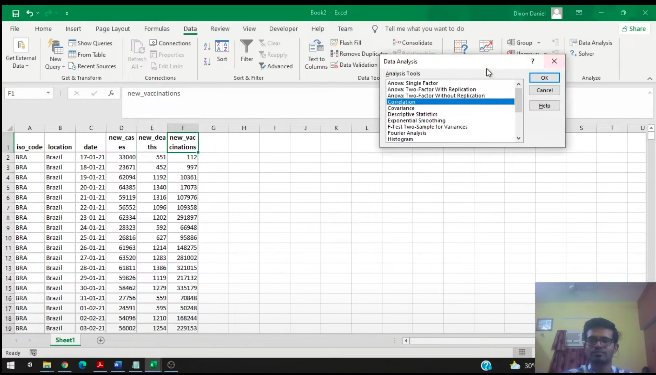

- Specify the input output ranges

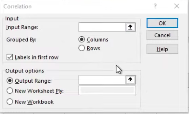

- Once you do it, you'll get the output:

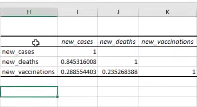

# Regression with Excel

- Similar to how we did in BA course
- Relation between independent variable(s) and a dependent variable
- SLR vs MLR

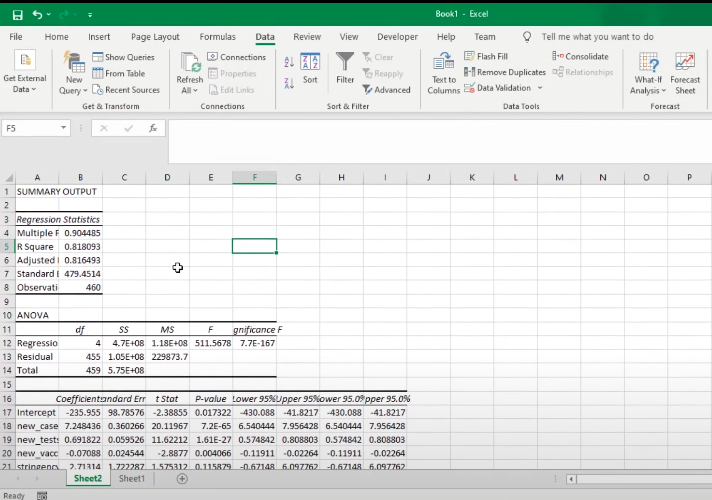

- Need to see adjusted $R^2$ for MLR
- Here, it's 0.816
    - It means that the independent variable can explain 81.6% of the dependent variable
    
- Judge the model based on the confidence interval. Significant or insignificant
    - If the p-value is below 0.05, model is significant



# Outlier Detection with Excel

- Need to calculate **quartiles**
    - $Q_1$: First quartile / 25th percentile
    - $Q_2$: Third quartile / 75th percentile

- **OUTLIER:** Any value, $x$, in the dataset is considered to be an outlier if:
    - $x < Q_1 - (1.5 \times IQR)$<br>
    $$\text{OR}$$
    - $x > Q_3 + (1.5 \times IQR)$

<br>

- Apply the above formula in Excel

- Can also make the box-plot

# Forcasting Time Series with Python

In [48]:
 import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot

# from statsmodels.tsa.arima_model import ARIMA
# The above wont work

from statsmodels.tsa.arima.model import ARIMA


- Autoregressive integrated moving average (ARIMA) model is used to predict how something will act in the future based on past performance



In [3]:
!pwd

/Users/PushpakRuhil/IIT-M_CODING/TDS/WEEK4


In [9]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1_vQF2i5ubKmHQMBqoTwsu6AlevWsQtTD/export?format=csv&id=1_vQF2i5ubKmHQMBqoTwsu6AlevWsQtTD&gid=790744269")


In [11]:
data.head(3)

,iso_code,location,date,new_cases,new_cases_smoothed,total_deaths
0,OWID_EUR,Europe,7/10/2021,85170.0,90282.00,1114963.0
1,OWID_EUR,Europe,7/9/2021,110454.0,87077.71,1114071.0
2,OWID_EUR,Europe,7/8/2021,99385.0,82298.14,1113121.0


In [12]:
data['location'].unique()

array(['Europe', 'Brazil', 'India', 'Japan', 'Israel'], dtype=object)

In [13]:
country = 'India'
data = data[data['location']==country]

In [14]:
data.head(3)

,iso_code,location,date,new_cases,new_cases_smoothed,total_deaths
289,IND,India,7/10/2021,41506.0,41684.14,408040.0
291,IND,India,7/9/2021,42766.0,41907.71,407145.0
294,IND,India,7/8/2021,43393.0,42099.86,405939.0


In [18]:
data.isnull().sum()

iso_code               0
location               0
date                   0
new_cases              0
new_cases_smoothed     5
total_deaths          41
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

iso_code              0
location              0
date                  0
new_cases             0
new_cases_smoothed    0
total_deaths          0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 289 to 2470
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iso_code            487 non-null    object 
 1   location            487 non-null    object 
 2   date                487 non-null    object 
 3   new_cases           487 non-null    float64
 4   new_cases_smoothed  487 non-null    float64
 5   total_deaths        487 non-null    float64
dtypes: float64(3), object(3)
memory usage: 26.6+ KB


In [23]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', ascending=True, inplace=True)

In [24]:
data['date'].min(), data['date'].max()

(Timestamp('2020-03-11 00:00:00'), Timestamp('2021-07-10 00:00:00'))

In [27]:
data.head(1)

,iso_code,location,date,new_cases,new_cases_smoothed,total_deaths
2469,IND,India,2020-03-11,6.0,4.857,1.0


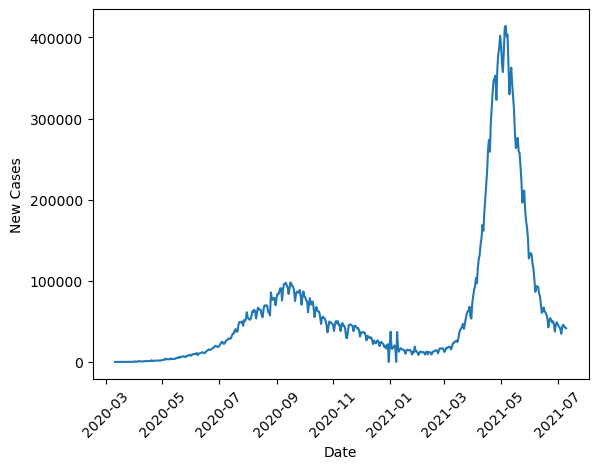

In [36]:
plt.plot(data['date'], data['new_cases'])
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.show()

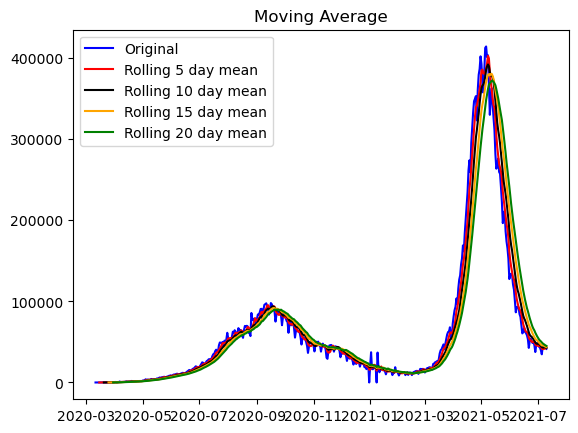

In [39]:
rolling_mean5 = data['new_cases'].rolling(window = 5).mean()
rolling_mean10 = data['new_cases'].rolling(window = 10).mean()
rolling_mean15 = data['new_cases'].rolling(window = 15).mean()
rolling_mean20 = data['new_cases'].rolling(window = 20).mean()

plt.plot(data['date'],data['new_cases'], color = 'blue', label = 'Original')

plt.plot(data['date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.show()

In [40]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,iso_code,location,date,new_cases,new_cases_smoothed,total_deaths,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
2469,IND,India,2020-03-11,6.0,4.857,1.0,NaN,NaN,NaN,NaN
2470,IND,India,2020-03-12,11.0,6.143,1.0,NaN,NaN,NaN,NaN
2450,IND,India,2020-03-13,9.0,7.286,2.0,NaN,NaN,NaN,NaN
2451,IND,India,2020-03-14,20.0,9.714,2.0,NaN,NaN,NaN,NaN
2452,IND,India,2020-03-15,11.0,10.571,2.0,11.4,NaN,NaN,NaN


In [41]:
data.dropna(inplace=True)
data.tail()

,iso_code,location,date,new_cases,new_cases_smoothed,total_deaths,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
296,IND,India,2021-07-06,43733.0,42973.86,404211.0,41082.8,43048.2,45720.266667,48167.60
295,IND,India,2021-07-07,45892.0,42560.43,405028.0,41439.0,43022.6,45389.866667,47338.20
294,IND,India,2021-07-08,43393.0,42099.86,405939.0,41503.4,43605.3,44678.133333,46470.20
291,IND,India,2021-07-09,42766.0,41907.71,407145.0,42097.4,43286.8,44084.733333,45697.20
289,IND,India,2021-07-10,41506.0,41684.14,408040.0,43458.0,42558.8,43605.266667,45100.05


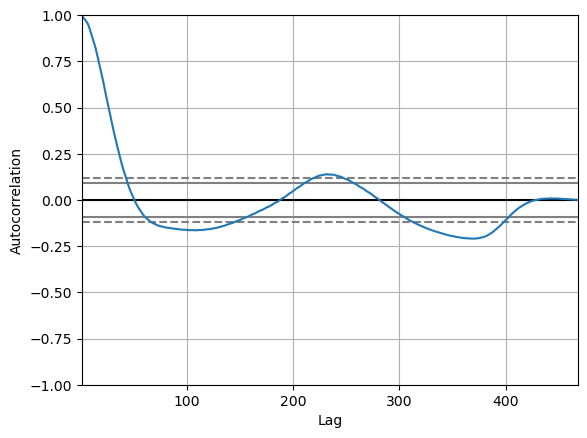

In [42]:
autocorrelation_plot(data['new_cases'])
plt.show()

- It shows what is the significant number for the rolling avg
    - anything above the dashed lines

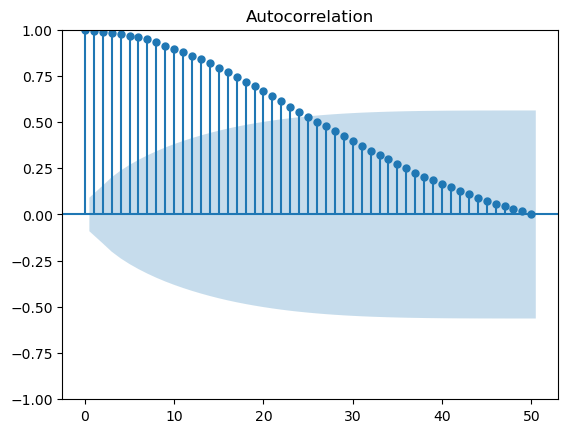

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


fig = sm.graphics.tsa.plot_acf(data['new_cases'].dropna(),lags=50)
plt.show()


- Similar to above, this also shows what is the significant number for the rolling avg
    - Here, upto ~24 is significant
    - Values, not falling in the blue shade

In [47]:
# 1,1,0 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data.new_cases, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  468
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4871.286
Date:                Sat, 21 Oct 2023   AIC                           9746.572
Time:                        03:38:50   BIC                           9754.865
Sample:                             0   HQIC                          9749.836
                                - 468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1387      0.022      6.380      0.000       0.096       0.181
sigma2      6.741e+07   5.66e-11   1.19e+18      0.000    6.74e+07    6.74e+07
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [50]:
model = ARIMA(data.new_cases, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  468
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4863.252
Date:                Sat, 21 Oct 2023   AIC                           9738.504
Time:                        03:40:29   BIC                           9763.382
Sample:                             0   HQIC                          9748.294
                                - 468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1431      0.023      6.260      0.000       0.098       0.188
ar.L2         -0.0719      0.030     -2.430      0.015      -0.130      -0.014
ar.L3          0.1526      0.033      4.618      0.0

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
model = ARIMA(data.new_cases, order=(10,1,0))
model_fit = model.fit()
print(model_fit.summary())

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  468
Model:                ARIMA(10, 1, 0)   Log Likelihood               -4690.586
Date:                Sat, 21 Oct 2023   AIC                           9403.173
Time:                        03:40:45   BIC                           9448.782
Sample:                             0   HQIC                          9421.122
                                - 468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1664      0.027     -6.217      0.000      -0.219      -0.114
ar.L2          0.0184      0.028      0.648      0.517      -0.037       0.074
ar.L3          0.1832      0.029      6.349      0.0

# Assignment Attempt